 **Описание проекта**
 <div class="alert alert-block alert-success">
<li>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<li>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<li>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</div>

**Описание данных**
<div class="alert alert-block alert-success">
<li>Name — название игры
<li>Platform — платформа
<li>Year_of_Release — год выпуска
<li>Genre — жанр игры
<li>NA_sales — продажи в Северной Америке (миллионы проданных копий)
<li>EU_sales — продажи в Европе (миллионы проданных копий)
<li>JP_sales — продажи в Японии (миллионы проданных копий)
<li>Other_sales — продажи в других странах (миллионы проданных копий)
<li>Critic_Score — оценка критиков (максимум 100)
<li>User_Score — оценка пользователей (максимум 10)
<li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</div>

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import missingno as msno

Установим необходимые библиотеки для работы с данными

In [3]:
data = pd.read_csv('games.csv')

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.shape

(16715, 11)

Познакомимся с данными

# Шаг 1. Подготовка данных:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Приведем названия столбцов к нижнему регистру*

In [7]:
data.columns = data.columns.str.lower()

**Обращаем внимание, что:** <li> столбец Year_of_Release в float64 (приведем к целочисленному)
    <li> столбец User_Score в object (приведем к "плавающему")
        <li> столбец Critic_Score в float64 (приведем к целочисленному)

In [8]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score', есть значение "tbd"(переводится "Будет определено") заменим его на NaN

In [9]:
data['user_score'] = data['user_score'].replace("tbd", np.NaN) 

In [10]:
data['year_of_release'] = data['year_of_release'].astype('Int32')
data['critic_score'] = data['critic_score'].astype('Int32')
data['user_score'] = data['user_score'].astype('float')

In [11]:
data.info() #Теперь данные в нужном типе

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int32  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(2), float64(5), object(4)
memory usage: 1.3+ MB


In [12]:
pd.DataFrame(data.isna().sum())

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,9125


In [13]:
pd.DataFrame(data.isna().mean()*100)

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,54.591684


<AxesSubplot:>

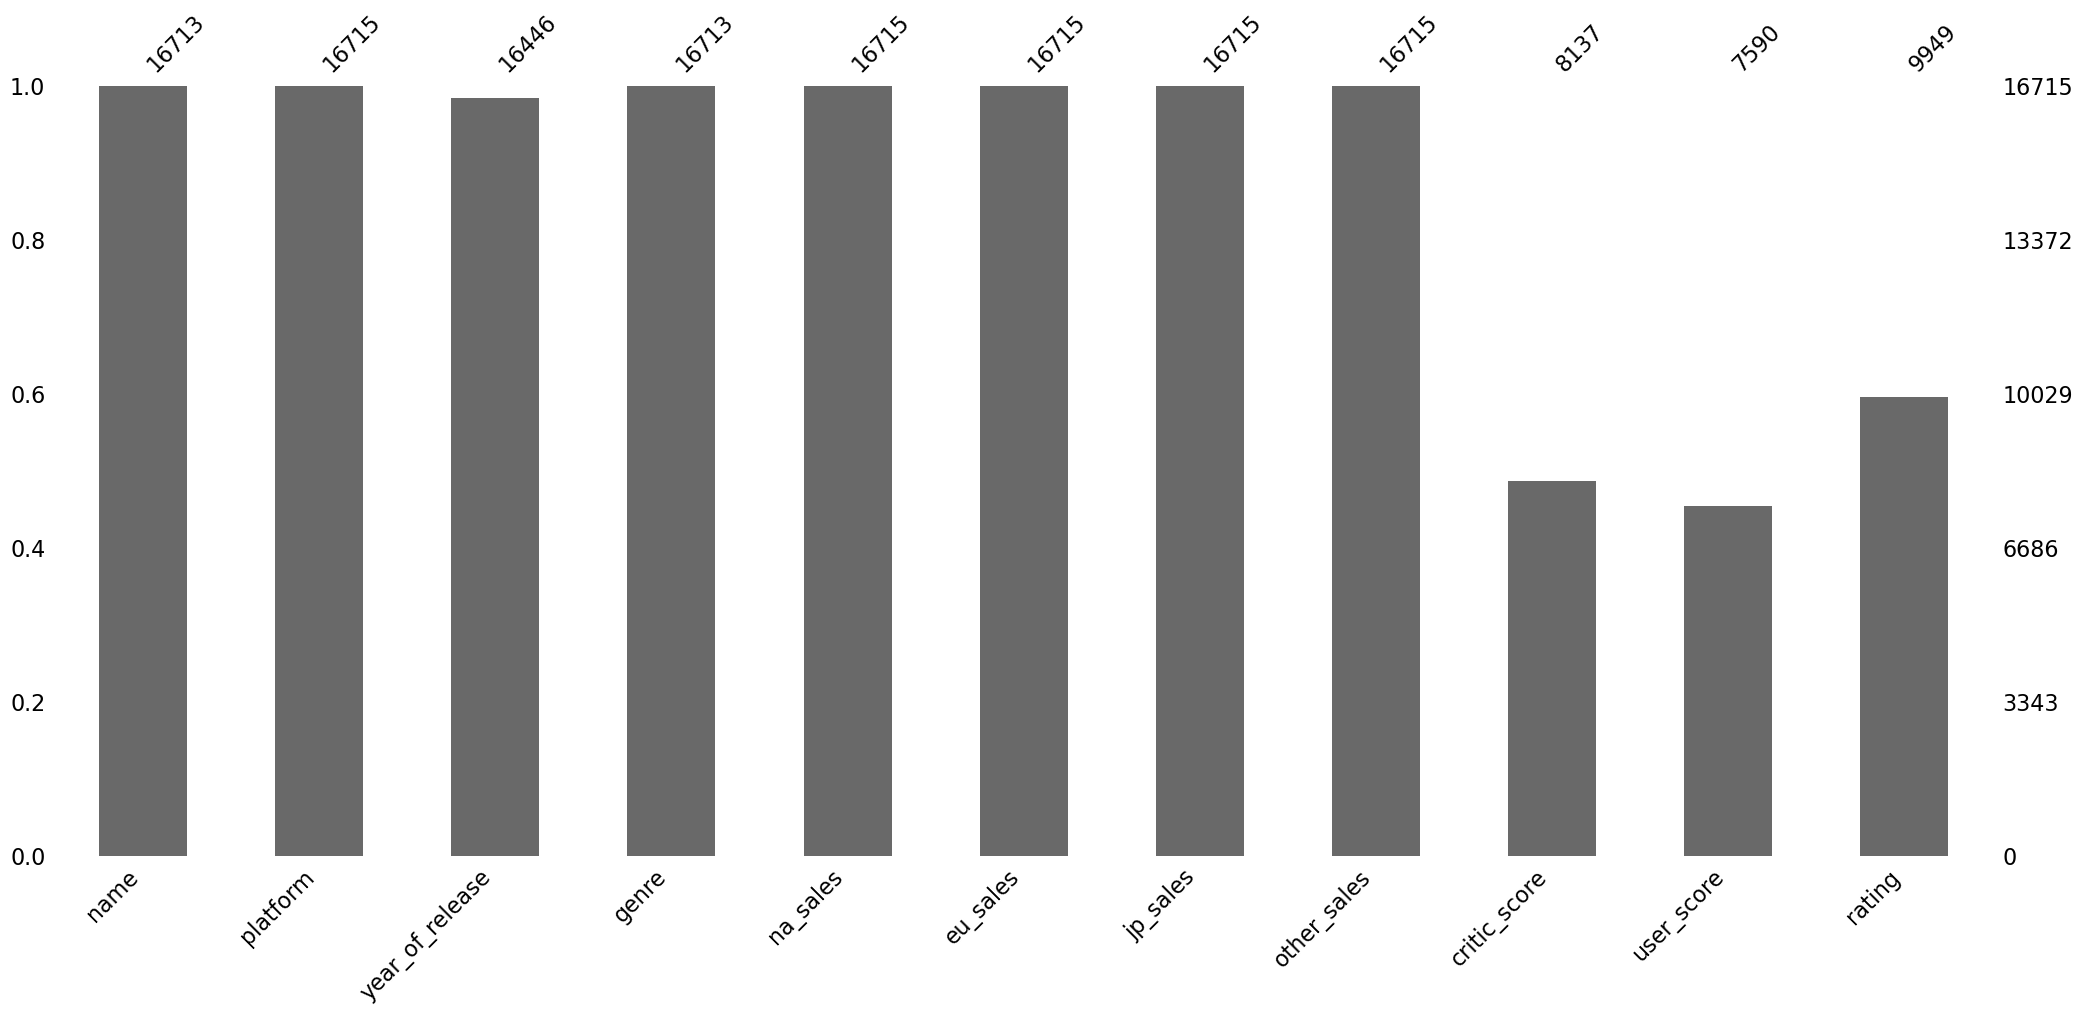

In [14]:
msno.bar(data)

Данная гистограмма позволяет наглядно увидеть количество недостающих данных по столбцам

In [15]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


# Первое впечатление:
<div class="alert alert-block alert-info">
<ol>
<li>Столбец year_of_release имеет 1.5% пропусков. Пропуски можно удалить, не боязь потерять качество данных.
<li>Столбец critic_score 51% пропусков. В данном столбце высокое стандартное отклонение, значит в данных много выбросов
<li>Столбец user_score почти 55% пропусков. Стандартное отклонение почти такое же высокое, как и критиков (если учесть что одна оценка оценивается по 100 бально шкале, другая по 10 бальной, как мы видим из данных) Поэтому, как и в случае с оценкой от критиков, пропуски в данных столбцах заменить не имеет возможности. Медиана, среднее, медиана по жанрам. Ни один из этих способов, не покажет реалестичной картины, поэтому пропуски оставим не заполненными, чтобы не исказить статистику.

In [16]:
s = 'Call of Duty: Black Ops 3'
data.query('name == @s')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,NaN
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,<NA>,NaN,NaN
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,<NA>,NaN,NaN
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,<NA>,NaN,NaN


Касаемо причин возникновения пропусков уверенно утверждать сложно, есть вероятность того, что: <li> старые игры имеют пропуски по данным столбцам в силу того, что система оценки игр была придумана позже <li> на примере игры Call of Duty: Black Ops 3 мы видим, что, возможно причина возникновения в ошибке выгрузки данных и, вообще, может стоит писать баг-репорт. 

In [17]:
data = data.dropna(subset = ['name'])
data = data.dropna(subset = ['genre'])
data = data.dropna(subset = ['year_of_release'])

<li> Так как в данных столбцах количество пропусков не более 1.5% их можно удалить
<li> Создадим столбец, содержащий в себе общее количетсво продаж

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Шаг 2. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

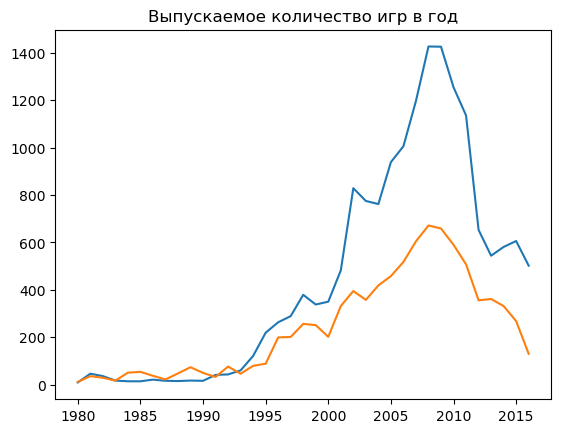

In [19]:
sales = data.groupby('year_of_release')[['total_sales']].sum()
number = data.groupby('year_of_release')[['name']].count()
data1 = number.join(sales)
plt.plot(data1)
plt.title('Выпускаемое количество игр в год')
plt.show()

Как видно по графикам было несколько скачков  в 1994 и 2000 гг.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Рассматривать будем начиная с 2000 г, так как начиная именно с этого год начался "БУМ" видеоигр

In [20]:
top_platform = ((data[data['year_of_release']>=2000])
               .pivot_table(index='platform', values='total_sales', aggfunc='sum')
               .sort_values(by='total_sales', ascending=False).head(10)
               )
top_platform
            

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


Топ 10 платформ за все время:PS2, X360, PS3, Wii, DS, PS4, GBA, PSP, 3DS, XB

In [21]:
top10_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'GBA', 'PSP', '3DS', 'XB']

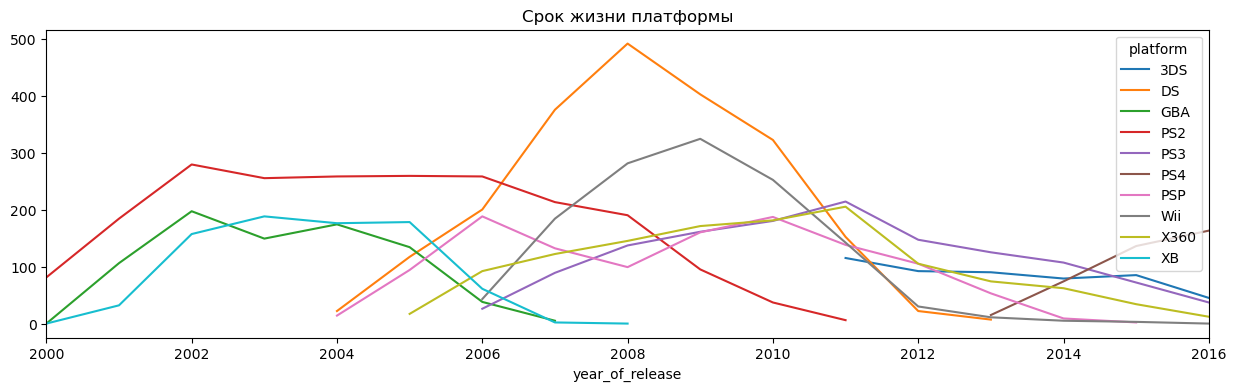

In [22]:
(data.query('year_of_release>=2000' and 'platform == @top10_platform') 
.groupby(['platform', 'year_of_release'])['total_sales']
.count().unstack('platform')
.plot(figsize=(15,4), title='Срок жизни платформы'))
 
plt.xlim([2000, 2016])
plt.show()

In [23]:
data_after2000 = data[data['year_of_release']>=2000]

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. <li> Но при этом, раз уж мы имеем данные начиная с первых игр, то было бы здорово рассмотреть Срок жизни платформ, начиная с нового тысячитилетия. <li> Поэтому рассмотрим на графике две переменные. Начиная с 2013 года (чтобы увидть актуальные тренды) и начиная с 2000 года (чтобы отследить средний срок жизни платформ)

In [24]:
data = data[data['year_of_release']>=2013]

### Найдем какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.

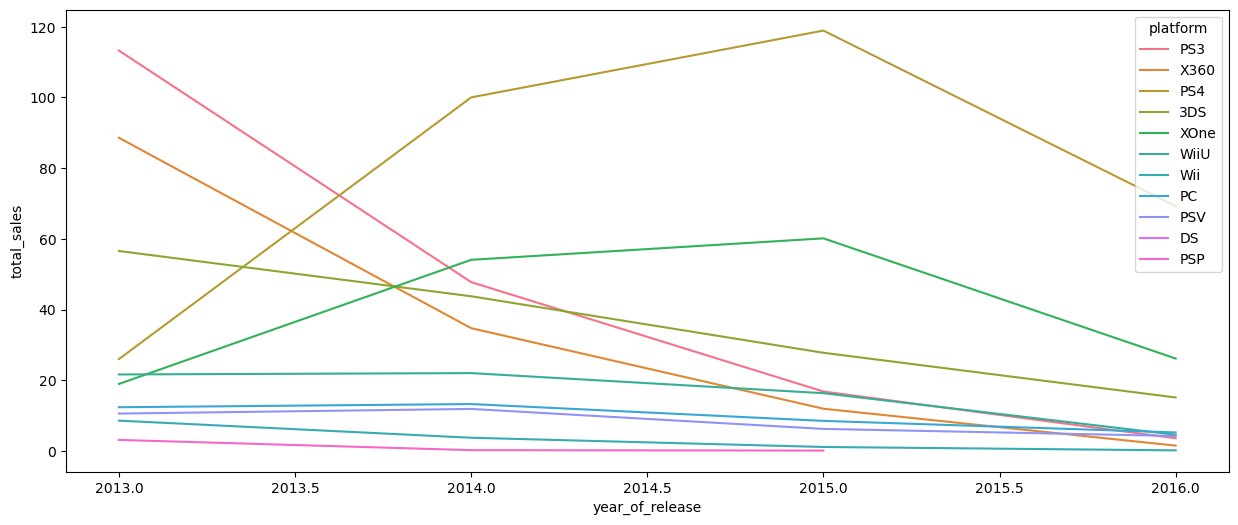

In [25]:
plt.figure(figsize=(15, 6))
(sns.lineplot(
    x='year_of_release',
    y='total_sales',
    hue='platform',
    data = data,
    markers=True,
    dashes=False,
    ci = None,
    estimator=sum))
plt.show()

По графику начиная с 2013 года видно, что продажи практически по всем платформам упали. Выигрышнее всего тут выглядят платформы **1 место PS4, 2 место XOne, 3 место 3DS** 
<div class="alert alert-block alert-info">
<li>
Стоит обратить внимание, что PS4 и XOne это новое обновление платформ PS3 и X360. Обе они вышли в 2013, а пик в продаж в 2015. Так что, если нашей целью стоит максимальное количество продаж, стоит учесть что "Драйвером" роста точно может стать еще одно обновление платформ, например PS5;)

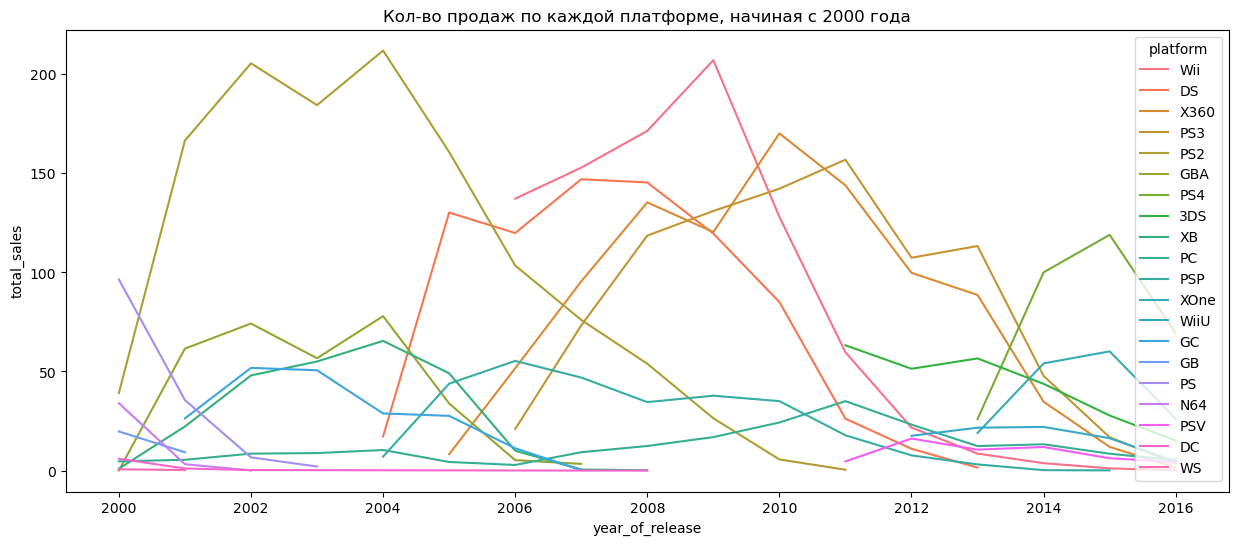

In [26]:
plt.figure(figsize=(15, 6))
(sns.lineplot(
    x='year_of_release',
    y='total_sales',
    hue='platform',
    data = data_after2000,
    markers=True,
    dashes=False,
    ci = None,
    estimator=sum))
plt.title('Кол-во продаж по каждой платформе, начиная с 2000 года')
plt.show()


По графику видно, что продажи по платформам падают. Выигрышнее всего тут выглядят платформы **PS4, XOne, 3DS**
<li>
Оно и логично, на xbox one и ps4 лидеры из приставок. У компании sony(ps4) и microsoft (xbox one) больше всего прав но выходы новых игр, исключительно под их платформы. Это гиганты отросли, которые все время соревнуются с собой, несложно догодаться, что предудыщие модели ps2 и x360 это старые версии данных компаний. Пользователи это понимают и охотнее их покупают, ведь они знают, что такая платформа будет актульна и получит больше экслюзивных игр. <li>Ну и конечно же 3DS- Nintendo культовая платформа, которая уже давно нашла своего лояльного покупателя.

### Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.

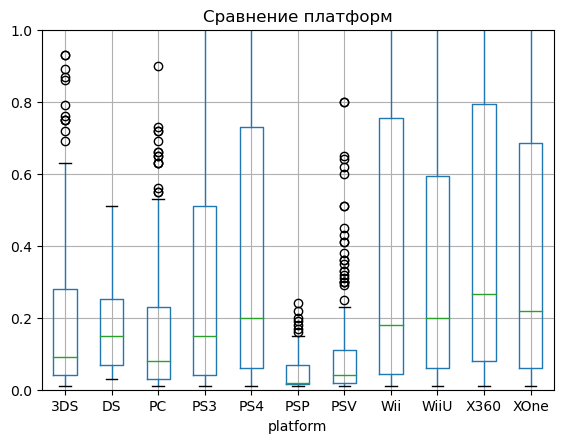

In [27]:
data.boxplot(column='total_sales', by='platform')
plt.title('Сравнение платформ')
plt.suptitle('') 
plt.ylim(0,1)
plt.show()

**По "ящику с усами" видно:**<li> Что самые большие глобальные продажи у X360, XOne, WiiU, PS4. <li>Очевидно PS4 и Хone  вырвутся вперед. Как я уже говорил ранее, связано это с популярностью и возможностью предоставить уникальные, эксклюзивные игры пользователям. WiiU (Nintendo) ус-во выпущенное в 2012 году, очевидно скоро уйдет с пика популярности вместе с PS3 и X360<li>Также бросается в глаза разброс. Впринципе, ему тоже есть логичное обьяснение. Некотрые игры "заходят", некоторые -нет.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.


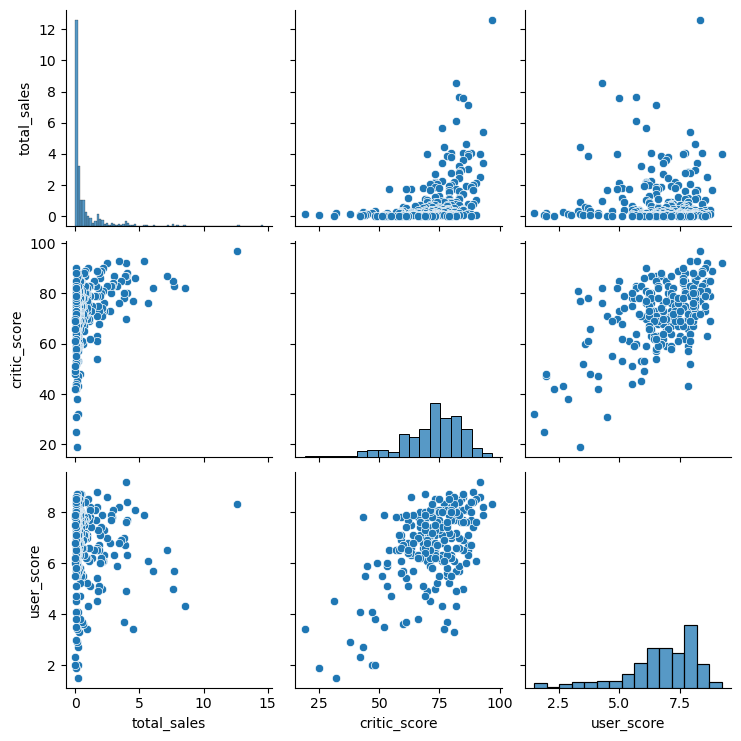

In [28]:
sns.pairplot(data[data['platform']=='PS4'][['total_sales', 'critic_score', 'user_score']])
plt.show()

**Диаграммы рассеяния говорят, что:** <li>Чем выше оценка критиков, тем лучше продается игра. <li>Чем выше оценка пользователей, тем тоже, игра продается лучше. Но есть ньюансы.Видно, что корреляция здесь ниже. На диаграмме видно, что есть, например, игры с оценками до 5 баллов, но при это они продаются довольно успешно. Думаю связано это с субъективностью оценки пользователей, в отличии от критиков, которые каждую игру оценивают по ряду критериев и независимо

In [29]:
data[data['platform'] =='PS4'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


<li>Между total_sales и critic_score есть слабая корреляция (т.к. значение находится в диапозоне от 0,3 до 0,5)
<li>Между total_sales и user_score есть слабая отрицательная корреляция (Вообще это значит, что с увеличением одного показателя уменьшается другой, но в даннно случаи он минимален. Как минимум, можно считать, что связи с оценкой пользователя нет. Повторюсь, оно и логично, выбирая игру мы смотри на отзыв оценки игровых критиков и разных изданий, а не на оценку пользователей)

### Соотнесем выводы с продажами игр на других платформах.

In [30]:
data[data['platform'] =='PC'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


In [31]:
data[data['platform'] =='PS3'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


In [32]:
data[data['platform'] =='XOne'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [33]:
data[data['platform'] =='3DS'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


In [34]:
data[data['platform'] =='Wii'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,NaN,0.682942
critic_score,NaN,NaN,NaN
user_score,0.682942,NaN,1.000000


По данным о корреляции на разных платформах видно:
<li>У всех платформ либо корреляции между оценкой пользователя и суммой продаж нету, либо она очень слабая 
<li>У компаниий Microsoft и Sony наблюдается отрицательная корреляция между оценкой пользователей и суммой продаж, возможно, что в "Маркетах" sony и microsoft не видно отзывово пользователей. 

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [35]:
data_genre=data.groupby("genre")['total_sales'].median()
genress = data_genre.index

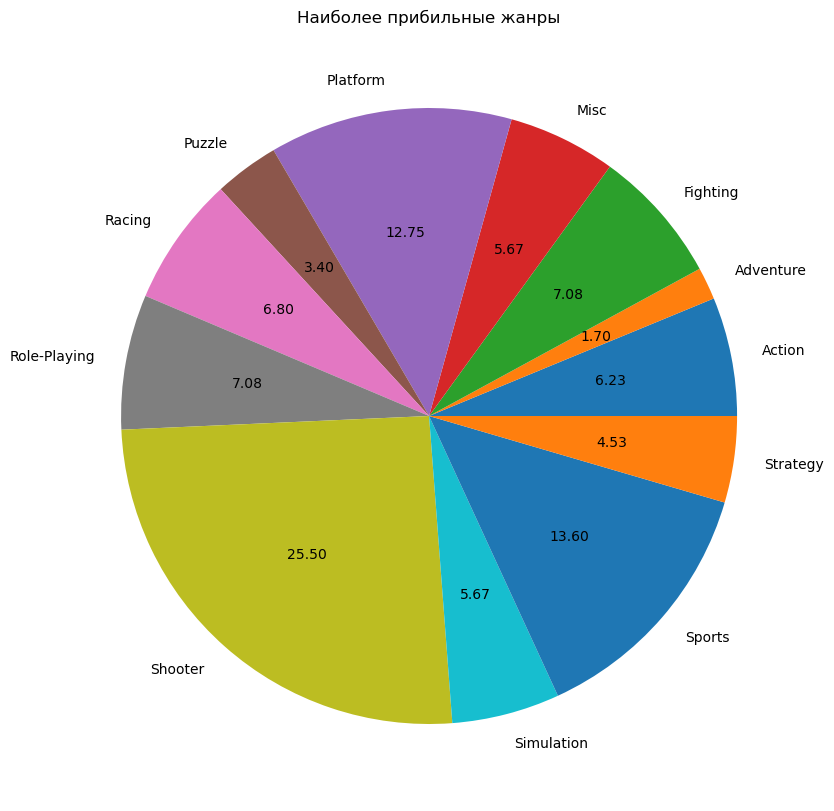

In [36]:
plt.figure(figsize=(20,10))
plt.pie(x=data_genre, labels=genress, autopct="%.2f")
plt.title('Наиболее прибильные жанры')
plt.show()

Самые прибыльные жанры Shooter, Sports, Platforms

In [37]:
data.groupby('genre')[['total_sales']].median().sort_values('total_sales', ascending=False)


,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


<li>Самый прибыльный жанр Shooter
<li>Следом идет Sports
<li>На 3 месте идет Platform(Платфо́рмер — жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов),возможно, в прибыльность этого жанра внесла Япония

# Шаг 3. Составляем портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Опишим различия в долях продаж.

In [38]:
rating_pivot_table = data.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
rating_pivot_table.columns = ['na_sales','jp_sales','eu_sales']

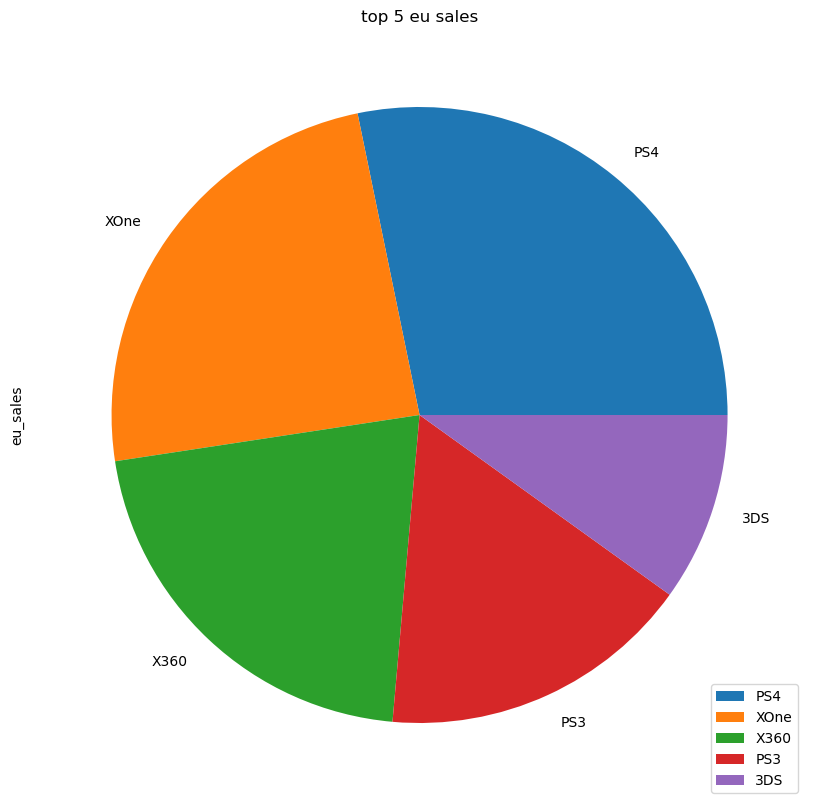

,eu_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [39]:
top5_eu = rating_pivot_table['eu_sales'].sort_values(ascending = False).head()
top5_eu = pd.DataFrame(top5_eu)
top5_eu.plot(kind='pie', title='top 5 eu sales', y='eu_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_eu

**В Европе лидирующие позиции занимают платформы:**
<li>
На 1 месте по популярности PS4. Платформа Японской компании Sony. Видимо рекламная компания, локализация и в целом восприятие бренда лучше у Американской компании. Несмотря на то, что, "красной нитью" по всем данным идет их конкуренция. Обычно эти компании дышат друг другу в спину.
<li>На 2 месте XOne. Американская компания Microsoft
<li>На 3 месте X360	

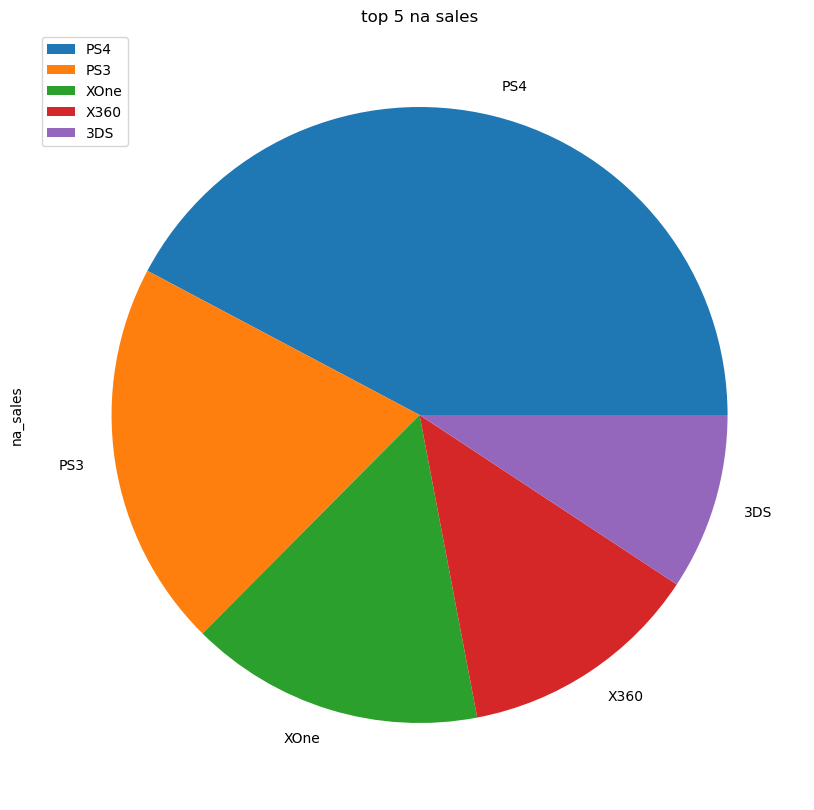

,na_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [40]:
top5_na = rating_pivot_table['na_sales'].sort_values(ascending = False).head()
top5_na = pd.DataFrame(top5_na)
top5_na.plot(kind='pie', title='top 5 na sales', y='na_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_na

**В Северной Америке лидирующие позиции занимают платформы:**
<li>
На 1 месте по популярности PS4.Парадокс, но, конкурирющая c местной, Японская платформа в 2.4 раза популярнее местного XOne
<li>На 2 месте PS3
<li>На 3 месте XOne

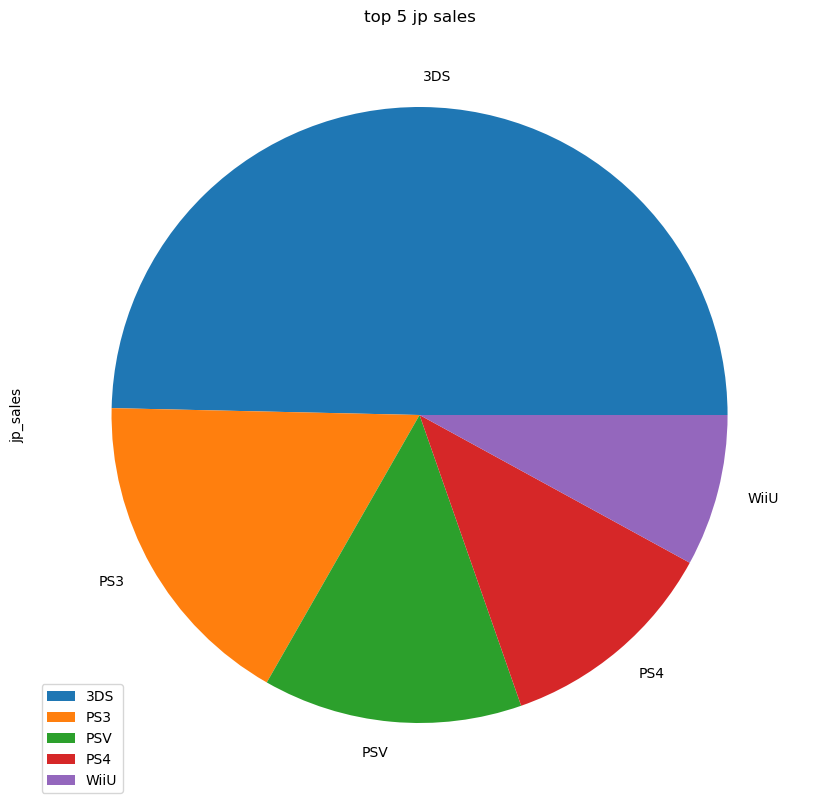

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


In [41]:
top5_jp = rating_pivot_table['jp_sales'].sort_values(ascending = False).head()
top5_jp = pd.DataFrame(top5_jp)
top5_jp.plot(kind='pie', title='top 5 jp sales', y='jp_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_jp

**В Японии лидирующие позиции занимают платформы:**
<li>
На 1 месте по популярности 3DS
<li>На 2 месте PS3
<li>На 3 месте PSV
    <li> По Японии отчетливо видно политика импортозамещения. В ТОП 5 платформ входят только Японские бренды, X360 в топе даже нет. Думаю еще одна причина популярности только Японских платформ. Сама культура Японцев,возможно, им не так важны популярные для всего мира эклсюзивы. У них своеобразный вкус на игры

### Самые популярные жанры (топ-5). Поясним разницу.


In [42]:
genre_pivot_table = data.pivot_table(index = 'genre', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
genre_pivot_table.columns = ['na_sales','jp_sales','eu_sales']

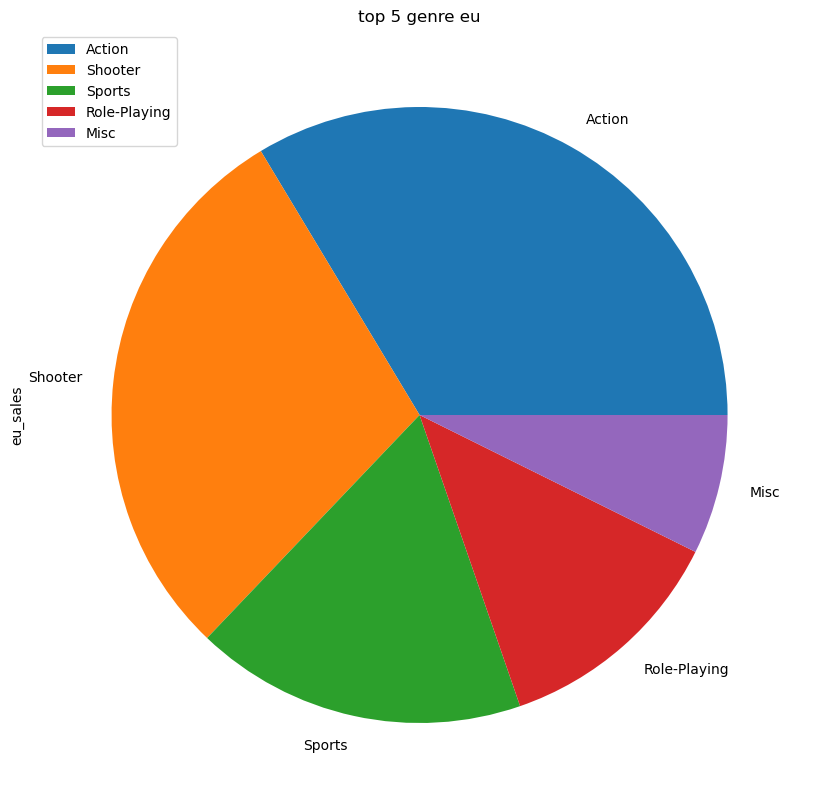

,eu_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [43]:
top5_genre_eu = genre_pivot_table['eu_sales'].sort_values(ascending = False).head()
top5_genre_eu = pd.DataFrame(top5_genre_eu)
top5_genre_eu.plot(kind='pie', title='top 5 genre eu', y='eu_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_genre_eu

**В Европе лидирующие позиции занимают жанры:**
<li>
На 1 месте по популярности Action
<li>На 2 месте Shooter
<li>На 3 месте Sports
    <li> Action, по праву, считается популярным жанром. Ничего не обычного, на втором месте жанр Шутер. 

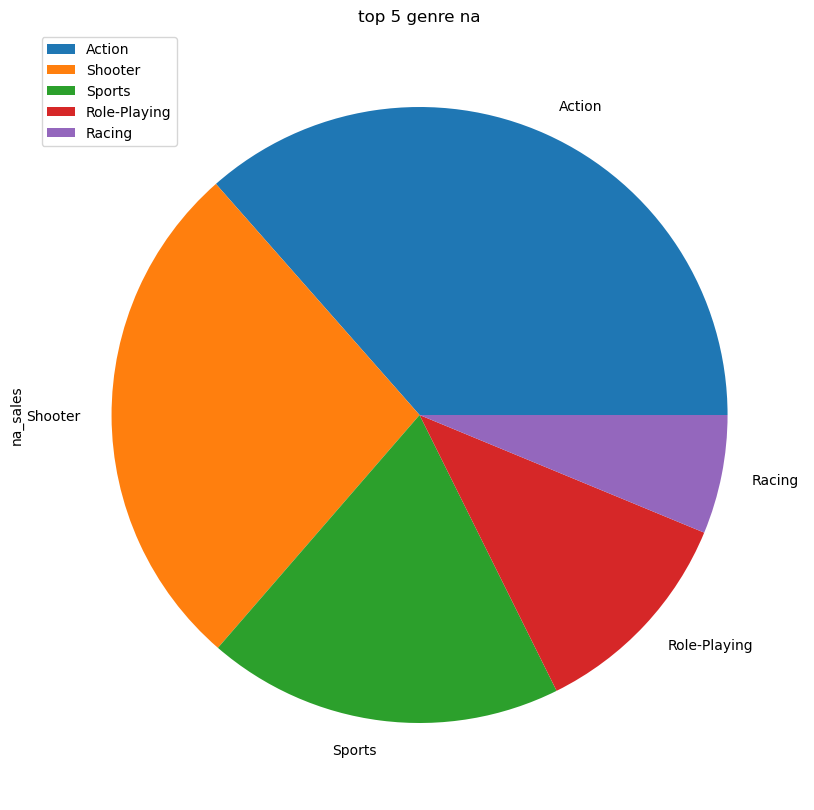

,na_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [44]:
top5_genre_na = genre_pivot_table['na_sales'].sort_values(ascending = False).head()
top5_genre_na = pd.DataFrame(top5_genre_na)
top5_genre_na.plot(kind='pie', title='top 5 genre na', y='na_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_genre_na

**В Северной Америке лидирующие позиции занимают жанры:**
<li>
На 1 месте по популярности Action
<li>На 2 месте Shooter
<li>На 3 месте Sports
    <li> Action, по праву, считается популярным жанром. Топ 4 популярных жанров такой же как в Европе. Но на 5 месте Гонки.

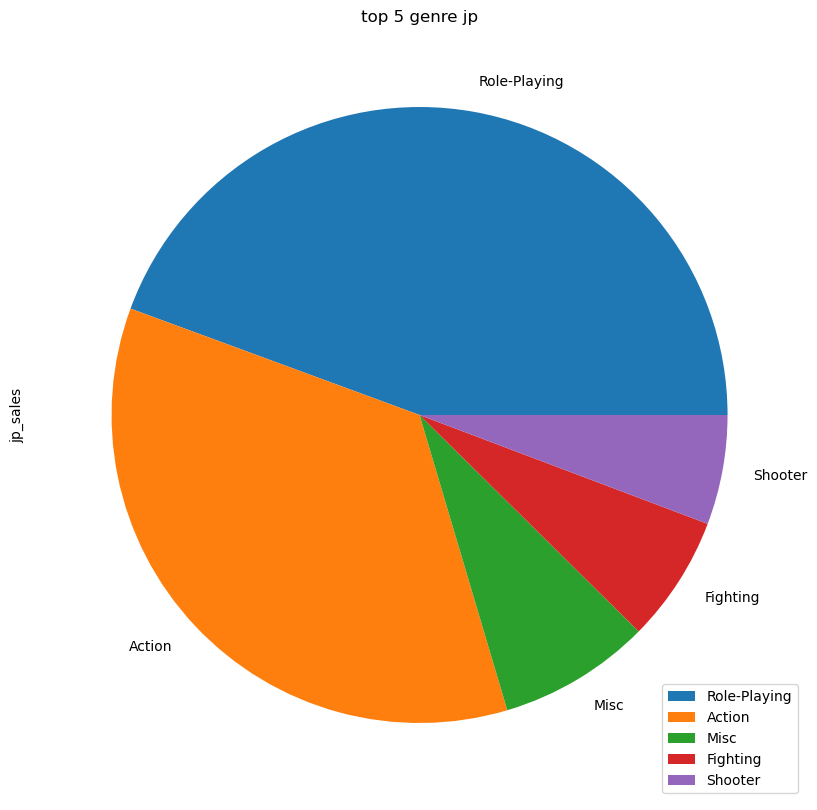

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [45]:
top5_genre_jp = genre_pivot_table['jp_sales'].sort_values(ascending = False).head()
top5_genre_jp = pd.DataFrame(top5_genre_jp)
top5_genre_jp.plot(kind='pie', title='top 5 genre jp', y='jp_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_genre_jp

**В Японии лидирующие позиции занимают жанры:**
<li>
На 1 месте по популярности Role-Playing
<li>На 2 месте Action
<li>На 3 месте Misc	
    <li> В Японии, в отличии, от Северной Америке и Европы, топ популярных жанров совсем иной. На 1 месте Ролевые Игры. Как я и писал раннее, связано это с культурой, модой Японцев. Японцы предпочитают играть не в общеизвестные мировые игры. А в игры, предназначенные под собственный рынок, отсюда и популярность платфомы Nintendo. Игры на ней, весьма отличаются от PS и Xbox. Поэтому если появится новая игра, она должна хорошо оценить свои шансы на успех, учитывая Японскую специфику и вкусы пользователей

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [46]:
data.rating.unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

Описание:
- «E» («Everyone») — «Всем» 
- «M» («Mature») — «Взрослым»  
- «T» («Teen») — «Подросткам»  
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста» 
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [47]:
ESRB_pivot_table = data.pivot_table(index = 'rating', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
ESRB_pivot_table.columns = ['na_sales','jp_sales','eu_sales']
ESRB_pivot_table

,na_sales,jp_sales,eu_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79


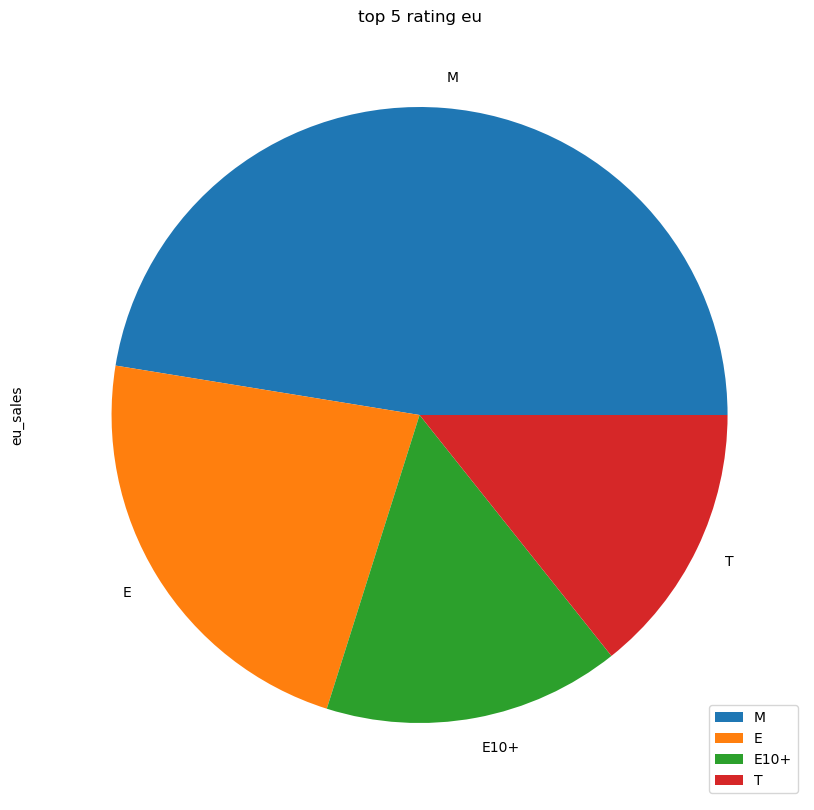

,eu_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [48]:
top5_rating_eu = ESRB_pivot_table['eu_sales'].sort_values(ascending = False).head()
top5_rating_eu = pd.DataFrame(top5_rating_eu)
top5_rating_eu.plot(kind='pie', title='top 5 rating eu', y='eu_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_rating_eu

В Европе:
- 1 место «M» («Mature») — «Взрослым»
- 2 место «E» («Everyone») — «Всем» 
- 3 место «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

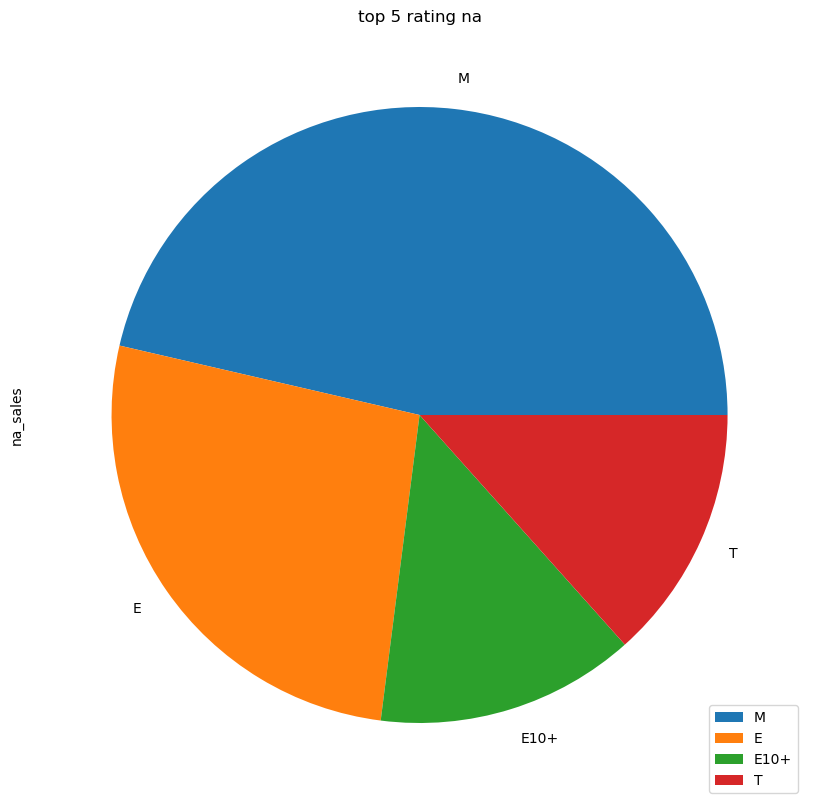

,na_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [49]:
top5_rating_na = ESRB_pivot_table['na_sales'].sort_values(ascending = False).head()
top5_rating_na = pd.DataFrame(top5_rating_na)
top5_rating_na.plot(kind='pie', title='top 5 rating na', y='na_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_rating_na

В Северной Америке, также как и в Европе:
- 1 место «M» («Mature») — «Взрослым»
- 2 место «E» («Everyone») — «Всем» 
- 3 место «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

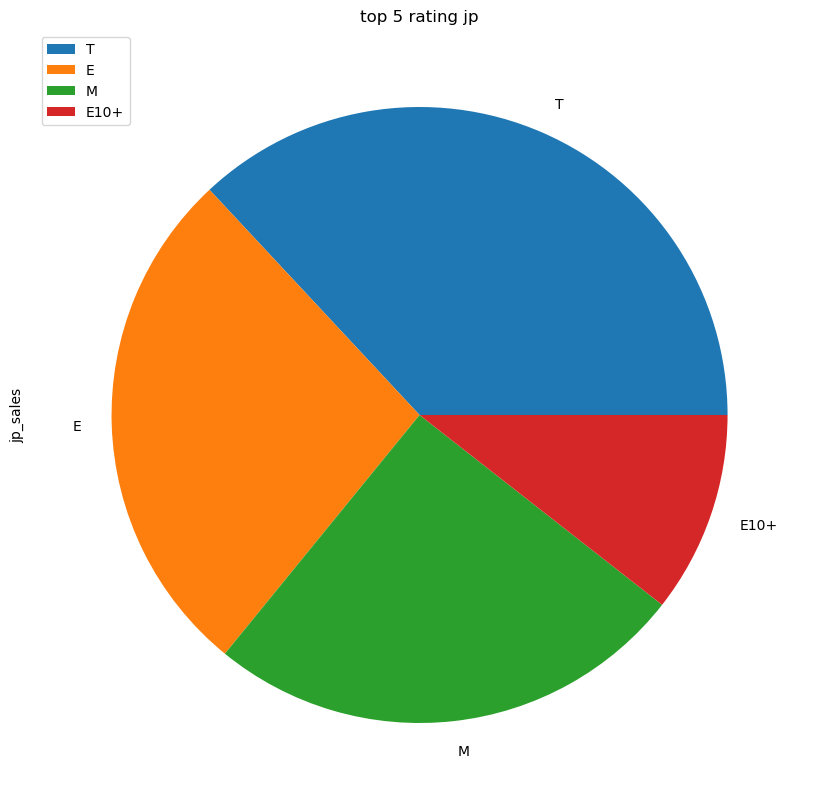

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


In [50]:
top5_rating_jp = ESRB_pivot_table['jp_sales'].sort_values(ascending = False).head()
top5_rating_jp = pd.DataFrame(top5_rating_jp)
top5_rating_jp.plot(kind='pie', title='top 5 rating jp', y='jp_sales', \
                grid=True, figsize=(10,10) )
plt.show()
top5_rating_jp

В Японии:
- 1 место «T» («Teen») — «Подросткам» 
- 1 место «E» («Everyone») — «Всем» 
- 3 место «M» («Mature») — «Взрослым»  
- Видимо у Японии, в силу ее специфики и культуры, очень много играющих тинейджеров


**Так как нашей задачей было составить портрет пользователя каждого региона, то, стоит отметить следующее:**
<div class="alert alert-block alert-info">
<li>Европейских рынок компьютерных игр очень схож с Северно-Американским, примерно те же популярные жанры, те же возрастные рейтинга, единственное отличие, это в популярности платформ. В Европе и Америкена 1 месте PS4.
<li>Однако стоит внимательнее присмотреться к специфике Японского региона. 
<li>В нем самые популярные платформы только Японские (X360 нет)
<li>Самый популярный жанр Ролевой, в отличии от Шутеров
<li>Первый по популярности возростной рейтинг - T (Для тинейджеров)

# Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Будем считать, что:
- H0.Нулевая гипотеза это - средние пользовательские рейтинги платформ Xbox One и PC равны
- H1.Альтернативная гипотеза это - средние пользовательские рейтинги платформ Xbox One и PC не равны

Подготовим данные для оценки, для этого избавимся от пропущенных значений и 0 оценки 

In [51]:
data_for_hypothish = data.user_score.dropna()
data_for_hypothish = data[data['user_score']>0] 
data_for_hypothish.user_score.unique()  

array([8.2, 8.1, 8.3, 2.6, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.4,
       6.4, 3.4, 8.5, 4.8, 9. , 4.9, 4.5, 6.2, 4.2, 6.3, 7.7, 9.2, 7.6,
       8.7, 6.7, 3.7, 7. , 6.9, 4.1, 5.8, 5.6, 6.8, 5.5, 7.5, 4.4, 5.9,
       7.2, 8.9, 3.9, 7.8, 3.2, 8.6, 3.1, 7.4, 7.3, 6.6, 6. , 4.7, 7.1,
       8.8, 5.1, 3. , 2.9, 2.7, 2.2, 8. , 3.5, 5.2, 5.3, 3.8, 4.6, 3.3,
       9.3, 4. , 3.6, 2.4, 2.8, 1.8, 1.7, 1.6, 2.1, 2. , 1.5, 0.7, 2.5,
       0.2, 1.9, 1.3, 1. , 1.4, 2.3])

In [52]:
alpha = .05
results = st.ttest_ind(
    data_for_hypothish[data_for_hypothish['platform'] == 'XOne']['user_score'], 
    data_for_hypothish[data_for_hypothish['platform'] == 'PC']['user_score']
)
print('p-значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Нормальным считается уровень уровень значимости — 5%, то есть по 2.5% с каждой стороны. Но аналитик может выбрать и другой уровень — в 1% или даже 0.01%. В данном случае, как мне кажется, уровень в 5% будет более уместным. Мы видим, что гипотеза подтвердилась средняя оценка пользователей Xbox не отличается от PC

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Будем считать, что:
- H0.Нулевая гипотеза это - средние пользовательские рейтинги жанров Action и Sports равны 
- H1.Альтернативная гипотеза это - средние пользовательские рейтинги жанров Action и Sports не равны 

In [53]:
alpha = .05
results = st.ttest_ind(
    data_for_hypothish[data_for_hypothish['genre'] == 'Action']['user_score'], 
    data_for_hypothish[data_for_hypothish['genre'] == 'Sports']['user_score']
)
print('p-значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Как выяснилось средние оценки в жанре Action и Sports отличаются

# Шаг 6. Общий вывод

## Вывод по подготовке данных
<div class="alert alert-block alert-info">
<li> Привели данные в колонках в соответствии с их типом
<li>обнаружили в столбце user score "tbd" (Будет определено) и заменили на Nan
<li>Столбцы critic score и user score оставили без измений. Потому, что нету эффективного способа заменить пропуски в данных столбцах- данные можно только исказить

## Вывод по исслодовательскому анализу и по портрету каждого региона
<div class="alert alert-block alert-info">
<li>У рынка компьютерных игр было несколько скачков роста. В 1994 и 2000 году. После 2008 количество выпускаемых игр в год снизилось
<li> ТОП 3 популярных платформ c 2013 года это PS4, XOne, 3DS
<li> Продажи платформ падают, однако у PS4 и Xone есть потенциал (Это обновления линейки SONY и Microsoft) 3DS(Nintendo стоит тоже выпустить апгрейд)
<li> По всем платформ прослеживается тенденция. Чем выше оценка критиков, тем лучше продается игра
<li> Во всем мире ТОП 3 популярных жанров: Shooter, Sports, Platfotm
<li> У Европы предпочтения по жанрам и платформам схожи с Северной Америкой. Однако Япония отличается от них координально. У Японии самый популярный жанр- ролевой. Самая популярная платформа - Nintendo
<li> Возрастной рейтинг также отличается у Японии. У СА и Европы самые продаваемые игры возрастного рейтинга  M(Взрослым) , E (всем). В то время как у Японии (T,E) то есть игры для тинейджеров популярнее, чем для взрослых. 

## Вывод по проверке гипотез
<div class="alert alert-block alert-info">
<li> После проведения теста было выявленно, что средние пользовательские рейтинги платформ Xbox One и PC  равны
<li> Однако тест показал, что разные  средние пользовательские рейтинги жанров Action  и  Sports.

## После проведения данного исследования можно выделить следующие закономерности, определяющие успешность игры
<div class="alert alert-block alert-info">
<li> В выборе платформы ставку следует сделать на PS4, Xone и PC ( Nintendo в случае, если рассматриваем Японский рынок)
<li> Игру следует выбрать в жанре Shooter (Role play в случае Японии)
<li> Возрастной рейтинг «M» («Mature») — «Взрослым»
<li> Раз уж мне довелось разобрать данные и начиная с 2000 года, скажу:</div>

**ЖАНР SHOOTER сместил ACTION, возрастной рейтинг «M» («Mature») — «Взрослым» сместил  «E» («Everyone») — «Всем». Поэтому вероятный успех для игры это: 
 ШУТЕР ДЛЯ ВЗРОСЛЫХ НА НОВОЙ ВЕРСИИ ПЛАТФОРМЫ**